In [2]:
import numpy as np
import pandas as pd
import tensorflow as tf

ModuleNotFoundError: No module named 'tensorflow'

In [2]:
df = pd.read_csv('pokemon.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 13 columns):
#             800 non-null int64
Name          800 non-null object
Type 1        800 non-null object
Type 2        414 non-null object
Total         800 non-null int64
HP            800 non-null int64
Attack        800 non-null int64
Defense       800 non-null int64
Sp. Atk       800 non-null int64
Sp. Def       800 non-null int64
Speed         800 non-null int64
Generation    800 non-null int64
Legendary     800 non-null bool
dtypes: bool(1), int64(9), object(3)
memory usage: 75.9+ KB


In [4]:
df_n = df[['Attack', 'Defense']]

In [5]:
import matplotlib.pyplot as plt
%matplotlib inline

Text(0,0.5,'Attack')

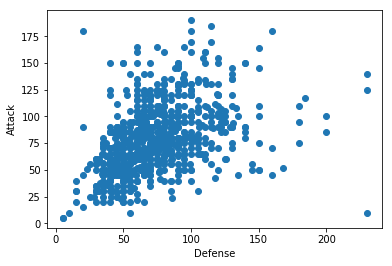

In [7]:
plt.scatter(df_n.Defense, df_n.Attack)
plt.xlabel('Defense')
plt.ylabel('Attack')

In [8]:
from sklearn.cluster import KMeans

In [10]:
kmeans = KMeans(3)

In [11]:
kmeans.fit(df_n)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [12]:
clusters = df_n.copy()

In [13]:
clusters['prediction'] = kmeans.fit_predict(df_n)

Text(0,0.5,'Attack')

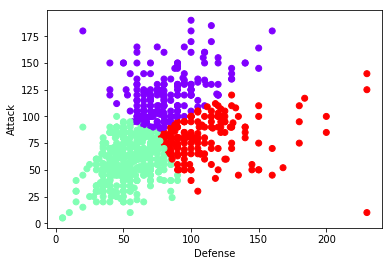

In [14]:
plt.scatter(clusters.Defense, clusters.Attack, c = clusters.prediction, cmap = 'rainbow')
plt.xlabel('Defense')
plt.ylabel('Attack')

In [15]:
from sklearn import preprocessing

In [16]:
df_scaled = preprocessing.scale(df_n)

In [18]:
df_scaled

array([[-0.92490618, -0.79715364],
       [-0.5241302 , -0.34791742],
       [ 0.09244823,  0.29384863],
       ...,
       [ 0.95565803, -0.44418232],
       [ 2.49710411, -0.44418232],
       [ 0.95565803,  1.4811158 ]])

In [31]:
k = []
for i in range(1,10):
    kmeans = KMeans(i)
    kmeans.fit_predict(df_scaled)
    k.append(kmeans.inertia_)
 

k   

[1600.0,
 853.3477298974242,
 642.6777698508081,
 480.49450250321513,
 403.83672967401156,
 343.93742506464883,
 295.2545471353151,
 259.4929495538761,
 234.04341852888123]

Text(0,0.5,'K')

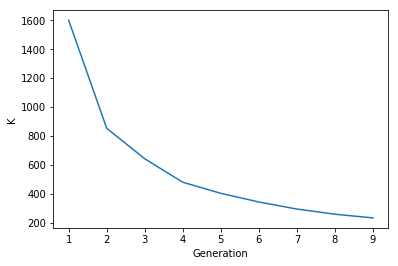

In [32]:
plt.plot(range(1,10),k)
plt.xlabel('Generation')
plt.ylabel('K')

In [33]:
kmeans = KMeans(4)

In [36]:
kmeans.fit(df_scaled)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=4, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [38]:
clusters = df_n.copy()
clusters['prediction'] = kmeans.fit_predict(df_n)

Text(0,0.5,'Attack')

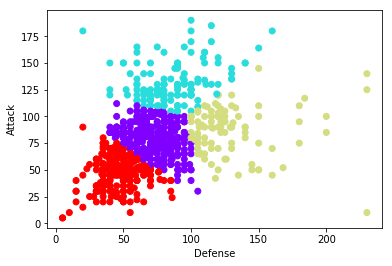

In [39]:
plt.scatter(clusters['Defense'], clusters['Attack'], c = clusters['prediction'], cmap = 'rainbow')
plt.xlabel('Defense')
plt.ylabel('Attack')